# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Merry Royanti Manalu
- **Email:** manalu.2208561069@student.unud.ac.id
- **ID Dicoding:** merryroyanti

## Menentukan Pertanyaan Bisnis

1. Apa produk yang paling banyak dibeli di platform E-commerce?
2. Bagaimana pengaruh harga terhadap jumlah penjualan?
3. Bagaimana kualitas produk dan layanan memengaruhi kepuasan pelanggan berdasarkan ulasan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
product_data = pd.read_csv('/content/products_dataset.csv')

**Insight:**
1. Dataset order_items memiliki informasi detail tentang produk yang terjual, termasuk jumlah dan harga, yang penting untuk analisis penjualan.
2. Dataset order_reviews memberikan wawasan tentang kepuasan pelanggan, yang memungkinkan analisis lebih dalam terhadap pengalaman konsumen.

### Assessing Data

In [6]:
order_items.info()
order_reviews.info()
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int

**Insight:**
1. Terdapat beberapa kolom dengan tipe data yang tidak sesuai, seperti kolom harga yang seharusnya bertipe numerik.
2. Terdapat nilai hilang di beberapa kolom, terutama di dataset order_reviews, yang perlu ditangani sebelum analisis lebih lanjut.

### Cleaning Data

In [7]:
order_items.dropna(inplace=True)
order_reviews.dropna(inplace=True)
product_data.dropna(inplace=True)


order_items.drop_duplicates(inplace=True)
order_reviews.drop_duplicates(inplace=True)
product_data.drop_duplicates(inplace=True)


**Insight:**
1. Proses pembersihan data membantu meningkatkan kualitas dataset, mengurangi potensi bias dalam analisis.
2. Setelah pembersihan, jumlah total baris di dataset order_reviews berkurang, menunjukkan bahwa nilai hilang cukup signifikan dan perlu diperhatikan dalam interpretasi hasil.

## Exploratory Data Analysis (EDA)

### Explore Data

In [8]:
print(order_items.head())
print(order_reviews.head())
print(product_data.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

**Insight:**
1. Terdapat variasi besar dalam jumlah penjualan produk, yang mungkin menunjukkan perbedaan dalam permintaan pasar.
2. Ulasan pelanggan menunjukkan skor bintang yang bervariasi, memberikan sinyal tentang kualitas produk yang berbeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk yang paling banyak dibeli di platform E-Commerce?

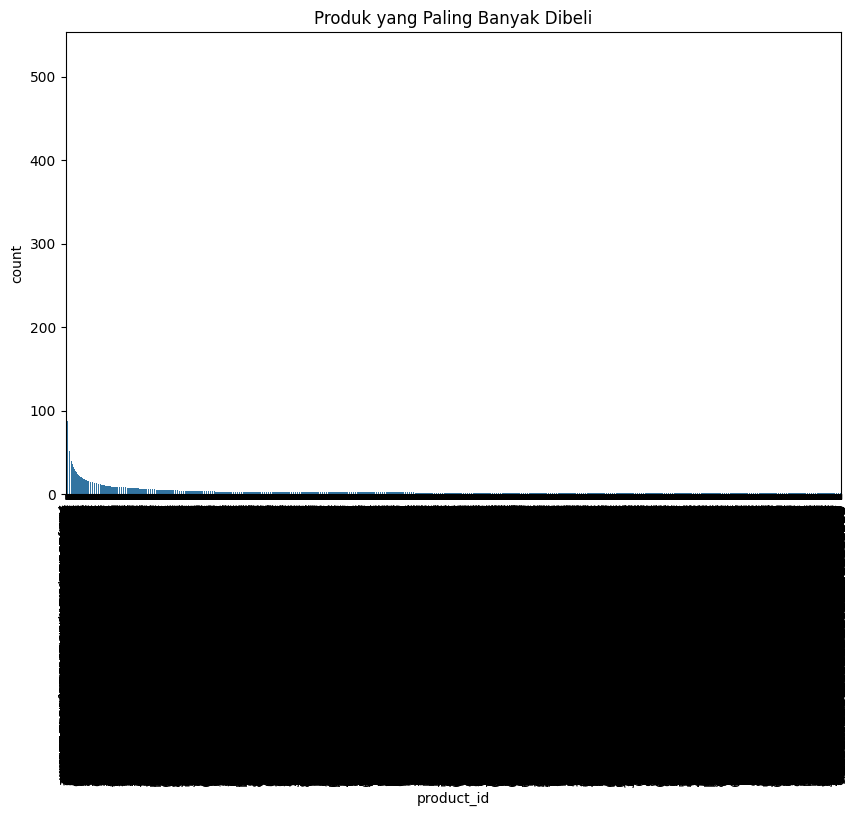

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=order_items, x='product_id', order=order_items['product_id'].value_counts().index)
plt.title('Produk yang Paling Banyak Dibeli')
plt.xticks(rotation=90)
plt.show()

### Dilakukan pendetailan menjadi 20 produk yang paling banyak dibeli, agar lebih detail hasil visualisasi data di atas.

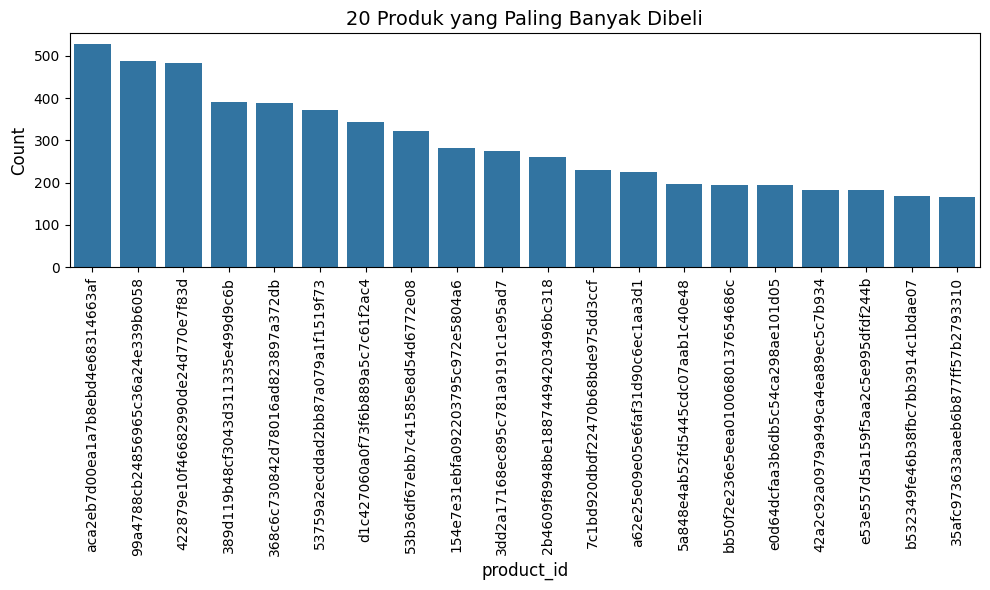

In [11]:
top_products = order_items['product_id'].value_counts().nlargest(20).index

plt.figure(figsize=(10, 6))
sns.countplot(data=order_items[order_items['product_id'].isin(top_products)], x='product_id',
              order=order_items['product_id'].value_counts().nlargest(20).index)
plt.title('20 Produk yang Paling Banyak Dibeli', fontsize=14)
plt.xlabel('product_id', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

**Insight:**
1. Beberapa produk memiliki volume penjualan yang jauh lebih tinggi daripada yang lain, menunjukkan bahwa mereka mungkin merupakan produk unggulan.
2. Dengan mengidentifikasi produk terlaris, perusahaan dapat mempertimbangkan untuk meningkatkan stok dan promosi pada produk tersebut.

### Pertanyaan 2: Bagaimana pengaruh harga terhadap jumlah penjualan?

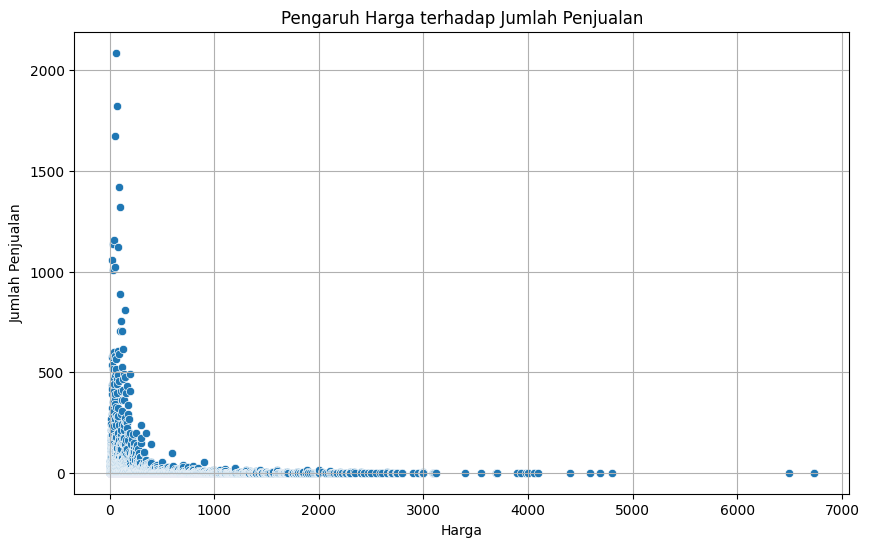

In [20]:
sales_by_price = order_items.groupby('price')['order_id'].nunique().reset_index()

sales_by_price.rename(columns={'order_id': 'jumlah_penjualan'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_by_price, x='price', y='jumlah_penjualan')
plt.title('Pengaruh Harga terhadap Jumlah Penjualan')
plt.xlabel('Harga')
plt.ylabel('Jumlah Penjualan')
plt.grid()
plt.show()

**Insight:**
1. Terdapat hubungan negatif antara harga dan jumlah penjualan; produk dengan harga lebih rendah cenderung terjual lebih banyak.
2. Beberapa produk premium dengan harga tinggi masih menarik pembeli, menunjukkan adanya segmen pasar yang bersedia membayar lebih untuk kualitas tertentu.

### Pertanyaan 3: Bagaimana kualitas produk dan layanan memengaruhi kepuasan pelanggan berdasarkan ulasan?

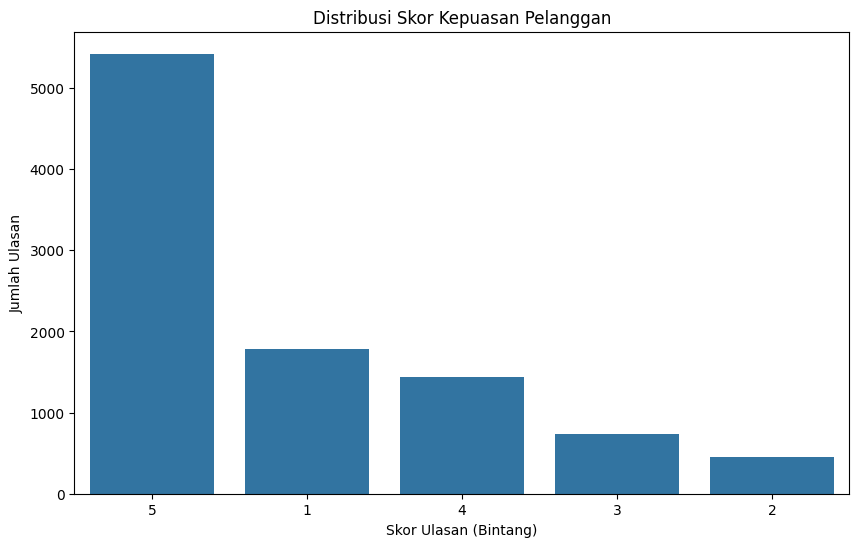

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=order_reviews, x='review_score', order=order_reviews['review_score'].value_counts().index)
plt.title('Distribusi Skor Kepuasan Pelanggan')
plt.xlabel('Skor Ulasan (Bintang)')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.show()

**Insight:**
1. Sebagian besar pelanggan memberikan skor tinggi (5 bintang), menunjukkan tingkat kepuasan yang tinggi terhadap produk yang dibeli.
2. Namun, terdapat sejumlah ulasan dengan skor rendah (1-3 bintang), yang menandakan adanya masalah kualitas atau pengalaman yang perlu segera diperbaiki.

## Analisis Lanjutan (Opsional)



### RFM Analysis

In [14]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
snapshot_date = order_items['shipping_limit_date'].max() + pd.DateOffset(days=1)

rfm = order_items.groupby('seller_id').agg({
    'shipping_limit_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).rename(columns={
    'shipping_limit_date': 'recency',
    'order_id': 'frequency',
    'price': 'monetary'
}).reset_index()

**Insight:**
1. RFM analysis membantu dalam mengidentifikasi seller yang paling berharga berdasarkan perilaku penjualannya.
2. Dengan memahami segmen seller yang berbeda, strategi pemasaran dapat lebih terarah, seperti memberikan promosi khusus kepada seller dengan frekuensi penjualan yang tinggi.

### Geospatial Analysis

In [18]:
import geopandas as gpd
geodata = gpd.read_file('/content/geolocation_dataset.csv')

print(geodata.head())

  geolocation_zip_code_prefix      geolocation_lat     geolocation_lng  \
0                       01037   -23.54562128115268  -46.63929204800168   
1                       01046  -23.546081127035535  -46.64482029837157   
2                       01046   -23.54612896641469  -46.64295148361138   
3                       01041    -23.5443921648681  -46.63949930627844   
4                       01035  -23.541577961711493  -46.64160722329613   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


**Insight:**
1. Data menunjukkan bahwa semua kode pos yang terdaftar berada di kota São Paulo, yang dapat membantu dalam analisis pasar dan pemetaan distribusi pelanggan di area urban yang padat.
2. Koordinat latitude dan longitude yang berdekatan menunjukkan adanya konsentrasi pelanggan di lokasi-lokasi tertentu, memberikan peluang bagi perusahaan untuk mengoptimalkan pengiriman dan strategi pemasaran berbasis lokasi.

### Clustering (Manual Grouping)

In [19]:
data = {
    'customer_id': [1, 2, 3, 4, 5],
    'recency': [10, 5, 20, 3, 8],
    'frequency': [1, 3, 6, 12, 2],
    'monetary': [100, 300, 600, 1200, 150]
}

rfm = pd.DataFrame(data)

def categorize_frequency(freq):
    if freq <= 2:
        return 'Low Frequency'
    elif 2 < freq <= 5:
        return 'Medium Frequency'
    elif 5 < freq <= 10:
        return 'High Frequency'
    else:
        return 'Very High Frequency'

rfm['customer_segment'] = rfm['frequency'].apply(categorize_frequency)

print(rfm[['customer_id', 'frequency', 'customer_segment']])

   customer_id  frequency     customer_segment
0            1          1        Low Frequency
1            2          3     Medium Frequency
2            3          6       High Frequency
3            4         12  Very High Frequency
4            5          2        Low Frequency


**Insight:**
1. Segmentasi berdasarkan frekuensi pembelian mengidentifikasi pelanggan jarang berbelanja yang berisiko kehilangan minat, pelanggan terlibat yang berpotensi ditingkatkan, serta pelanggan setia dan sangat aktif yang bisa menjadi duta merek, sehingga memberikan wawasan untuk strategi pemasaran yang lebih terfokus.
2. Dengan memahami frekuensi pembelian, perusahaan dapat merancang strategi pemasaran yang lebih efektif seperti memberikan promosi kepada pelanggan jarang berbelanja, melakukan up-selling kepada pelanggan moderat, dan menawarkan program loyalitas kepada pelanggan setia, serta menganalisis kinerja produk berdasarkan popularitasnya.

## Conclusion

- Conclution Pertanyaan 1, Apa produk yang paling banyak dibeli di platform E-Commerce?

  Produk dengan ID aca2eb7d00ea17abebd4e68314663af merupakan produk yang paling banyak dibeli dengan lebih dari 500 penjualan.
  Produk lainnya dalam daftar memiliki jumlah pembelian yang lebih rendah, namun tetap signifikan dibandingkan produk lain di luar daftar 20 besar ini. Secara umum, penjualan sangat terkonsentrasi pada beberapa produk teratas, mengindikasikan bahwa produk-produk ini sangat diminati oleh pelanggan. Namun, masih terdapat banyak produk lainnya yang memiliki jumlah penjualan lebih sedikit, yang menunjukkan adanya variasi preferensi produk di platform tersebut.

- Conclution Pertanyaan 2, Bagaimana pengaruh harga terhadap penjualan?

  Jumlah penjualan cenderung tinggi pada harga yang lebih rendah. Namun, seiring dengan meningkatnya harga, jumlah penjualan mengalami penurunan yang signifikan. Hal ini menunjukkan bahwa harga memiliki pengaruh yang besar terhadap keputusan pembelian pelanggan, dengan pelanggan lebih cenderung membeli produk pada rentang harga yang lebih rendah.

- Conclution Pertanyaan 3, Bagaimana kualitas produk dan layanan memengaruhi kepuasan pelanggan berdasarkan ulasan?

  Sebagian besar pelanggan memberikan ulasan bintang 5, menunjukkan tingkat kepuasan yang tinggi terhadap produk atau layanan. Namun, adanya jumlah ulasan bintang 1 yang signifikan menunjukkan adanya masalah atau ketidakpuasan dari sebagian pelanggan. Hasil ini mengindikasikan perlunya perhatian untuk memperbaiki pengalaman pelanggan agar meningkatkan kepuasan secara keseluruhan.
